In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('../1장/titanic/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* Passengerid: passenger id
* survived: 0 = did not survive, 1 = survived
* Pclass: passenger class, 1 = first class, 2 = second class, 3 = third class
* sex: passenger sex
* name: passenger name
* Age: passenger age
* sibsp: number of siblings or spouse onboard
* parch: number of parents or children onboard
* ticket: ticket number
* fare: fare price
* cabin: cabine number
* embarked: embarked port C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
print('\n ### train data info ###  \n')
print(titanic_df.info())


 ### train data info ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


**Fill in NULL values**

In [5]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

print('dataset Null value count ',titanic_df.isnull().sum().sum())

dataset Null value count  0


In [6]:
print('dataset Null value count ',titanic_df.isnull().sum())

dataset Null value count  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [7]:
print(' Sex value distribution :\n',titanic_df['Sex'].value_counts())
print('\n Cabin value distribution :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked value distribution :\n',titanic_df['Embarked'].value_counts())

 Sex value distribution :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin value distribution :
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
E101             3
              ... 
A36              1
C118             1
A19              1
C32              1
B102             1
Name: Cabin, Length: 148, dtype: int64

 Embarked value distribution :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [8]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))
titanic_df['Cabin'].value_counts()

0    N
1    C
2    N
Name: Cabin, dtype: object


N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [9]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

C:\Users\DooDoo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


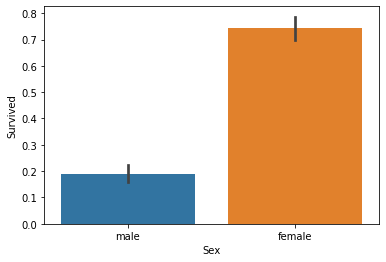

In [10]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

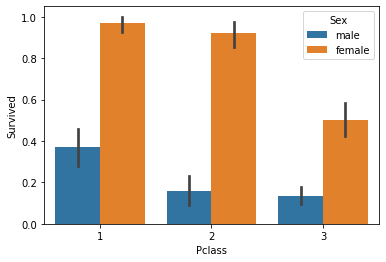

In [11]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

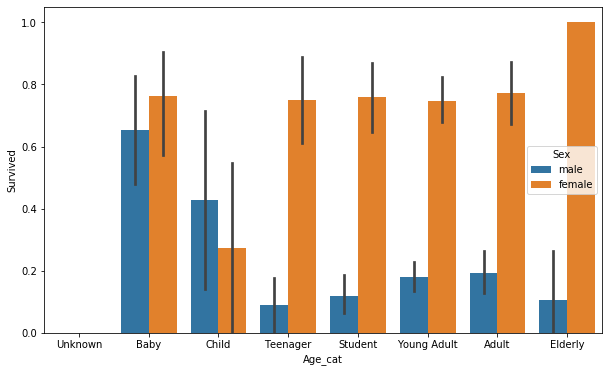

In [12]:
# function for categorizing depending on age  
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# bigger figure size on bargraph
plt.figure(figsize=(10,6))

#sort group names by age
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# use lambda to apply get_category function
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [13]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [14]:
from sklearn.preprocessing import LabelEncoder

# Null value processing
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# delete unnecessary features
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# label encoding  
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# call data preprocessing function
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [15]:
# get original data and collect feature/label data 
titanic_df = pd.read_csv('../1장/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Use Decision tree, randon forest, and logistic regression
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier accruacy: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier accuracy:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression accuracy: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier accruacy: 0.7877
RandomForestClassifier accuracy:0.8547
LogisticRegression accuracy: 0.8492


C:\Users\DooDoo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # apply kfold
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold cross validation
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # use X_titanic_df to get indexes for each fold 
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier train, test, and get accuarcy
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("cross validation {0} accuracy: {1:.4f}".format(iter_count, accuracy))     
    
    # get average accuracy. 
    mean_score = np.mean(scores)
    print("average accuracy: {0:.4f}".format(mean_score)) 
# call exec_kfold 
exec_kfold(dt_clf , folds=5) 


cross validation 0 accuracy: 0.7542
cross validation 1 accuracy: 0.7809
cross validation 2 accuracy: 0.7865
cross validation 3 accuracy: 0.7697
cross validation 4 accuracy: 0.8202
average accuracy: 0.7823


In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("corss validation set {0} accuracy: {1:.4f}".format(iter_count, accuracy))

print("average accuracy: {0:.4f}".format(np.mean(scores)))

corss validation set 0 accuracy: 0.7430
corss validation set 1 accuracy: 0.7753
corss validation set 2 accuracy: 0.7921
corss validation set 3 accuracy: 0.7865
corss validation set 4 accuracy: 0.8427
average accuracy: 0.7879


In [20]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV best hyperparaters :',grid_dclf.best_params_)
print('GridSearchCV highest accuracy: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# predict on GridSearchCV's best estimator 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('DecisionTreeClassifier accuracy on test set : {0:.4f}'.format(accuracy))


GridSearchCV best hyperparaters : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV highest accuracy: 0.7992
DecisionTreeClassifier accuracy on test set : 0.8715
